<a href="https://colab.research.google.com/github/ashouy/Aprendizado-de-Maquina/blob/main/Tarefa01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 01**
A atividade consiste em selecionar uma base de dados do tipo **Regressão** e outra do tipo **Classificação** e aplicar pelo menos dois dos 6 tratamentos listados abaixo:


1.   **Visão geral do data frame**
>*   Aleterar a visualização do dataframe, selecionando colunas específicas por exemplo.
>*   **loc, iloc, etc**
2.   **Dados Faltantes**
>*   Aplicar alguma estratégia para tratar os dados faltantes de a cordo com o contexto da base de dados.
>*   **Remoção das colunas, Remoção das linhas, Preenchimento com um valor definido, Preenchimento com a média ou moda**
3.    **Outliers**
>*    Tratar valor muito fora dos padrões
4.    **Mudança de escala**
>*     mudar alguma série de escalar para uma possível comparação
>*    **Normalização por reescala, normalização por padronização, StandardScaler, MinMaxScale**
5.    **Mudança de Tipo**
>*     Mudar o tipo de dados de uma coluna
>*    **Label Encoder**
6.    **Redução de dimensionalidade**
>*    **PCA**






#Aternativas:


*   https://www.kaggle.com/dannielr/marvel-superheroes

*   https://www.kaggle.com/omermetinn/values-of-top-nasdaq-copanies-from-2010-to-2020
* https://www.kaggle.com/sureshmecad/predict-a-doctors-consultation-fee




# Base para predição do custo de uma consulta médica

> ## Metadata
* O valor da consulta no final está em rúpia indiana IRN






### **Apresentação da base**

In [ ]:
import pandas as pd

consultas = pd.read_excel('https://github.com/ashouy/Aprendizado-de-Maquina/blob/main/bases/consultation_fee/train.xlsx?raw=true')
consultas

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


### **Tratamento**


#### Dados faltantes, alterar tipos

In [ ]:
hasNan = consultas.isnull().sum()
print(hasNan)

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64




*   Remoção coluna micellaneousInfo column (tratado como dado irrelevante)


In [ ]:
consultas_tratadas = consultas[['Qualification','Experience','Rating','Place','Profile','Fees']]
consultas_tratadas.head()


,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


* Mudando tipo do experience para int 

In [ ]:
#muda tipo experiencia
exp_column_int = consultas_tratadas['Experience'].str[:2].astype(int)
consultas_tratadas['Experience'] = exp_column_int


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


* muda rating para int e substitui os NAN pela média

In [ ]:
consultas['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [ ]:
import numpy as np

def convert_rating_to_int(rating_string):
  parsed = str(rating_string)
  if parsed == 'nan':
    return (rating_string)
  elif len(parsed) > 3:
    return int(parsed[:3])
  elif len(parsed) > 2:
    return int(parsed[:2])
  elif len(parsed) > 1:
    return int(parsed[:1])

test = consultas_tratadas['Rating'].apply(convert_rating_to_int)
test.head()

0    100.0
1     98.0
2      NaN
3      NaN
4    100.0
Name: Rating, dtype: float64

In [ ]:
consultas_tratadas['Rating'] = test
consultas_tratadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98.0,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41,97.0,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15,90.0,"Vileparle West, Mumbai",General Medicine,100


In [ ]:
consultas_tratadas.describe()

,Experience,Rating,Fees
count,5961.000000,2659.000000,5961.000000
mean,17.303976,94.643475,307.944640
std,11.142798,7.852813,190.920373
min,0.000000,7.000000,5.000000
25%,9.000000,93.000000,150.000000
50%,14.000000,97.000000,300.000000
75%,23.000000,100.000000,500.000000
max,66.000000,100.000000,950.000000


In [ ]:
from sklearn.impute import SimpleImputer

imput_mean = SimpleImputer(fill_value = 100, strategy='constant')
rating_column = imput_mean.fit_transform(consultas_tratadas[['Rating']])
rating_column

array([[100.],
       [ 98.],
       [100.],
       ...,
       [ 97.],
       [ 90.],
       [100.]])

In [ ]:
consultas_tratadas['Rating'] = rating_column
consultas_tratadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,100.0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,100.0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98.0,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33,100.0,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41,97.0,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15,90.0,"Vileparle West, Mumbai",General Medicine,100


* mudança de tipo do profile


In [ ]:
profile_types = pd.get_dummies(consultas_tratadas['Profile'], prefix='espec.')
profile_types

,espec._Ayurveda,espec._Dentist,espec._Dermatologists,espec._ENT Specialist,espec._General Medicine,espec._Homeopath
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
5956,0,0,0,1,0,0
5957,0,0,0,0,1,0
5958,0,0,0,0,1,0
5959,0,0,0,0,1,0


In [ ]:
consultas_tratadas.iloc[:,[0,1,2,3,5]]


,Qualification,Experience,Rating,Place,Fees
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,100.0,"Mathikere - BEL, Bangalore",300
3,"BSc - Zoology, BAMS",12,100.0,"Bannerghatta Road, Bangalore",250
4,BAMS,20,100.0,"Keelkattalai, Chennai",250
...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98.0,"Basavanagudi, Bangalore",300
5957,MBBS,33,100.0,"Nungambakkam, Chennai",100
5958,MBBS,41,97.0,"Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,90.0,"Vileparle West, Mumbai",100


In [ ]:
consultas_tratadas_final = profile_types.join(consultas_tratadas.iloc[:, [1,2,3,5]])
consultas_tratadas_final

,espec._Ayurveda,espec._Dentist,espec._Dermatologists,espec._ENT Specialist,espec._General Medicine,espec._Homeopath,Experience,Rating,Place,Fees
0,0,0,0,0,0,1,24,100.0,"Kakkanad, Ernakulam",100
1,1,0,0,0,0,0,12,98.0,"Whitefield, Bangalore",350
2,0,0,0,1,0,0,9,100.0,"Mathikere - BEL, Bangalore",300
3,1,0,0,0,0,0,12,100.0,"Bannerghatta Road, Bangalore",250
4,1,0,0,0,0,0,20,100.0,"Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...,...,...,...
5956,0,0,0,1,0,0,19,98.0,"Basavanagudi, Bangalore",300
5957,0,0,0,0,1,0,33,100.0,"Nungambakkam, Chennai",100
5958,0,0,0,0,1,0,41,97.0,"Greater Kailash Part 2, Delhi",600
5959,0,0,0,0,1,0,15,90.0,"Vileparle West, Mumbai",100


# Base do HERO DC_MARVEL

> ## Metadata
* Dados sobre os super hérois da DC e Marvel Commics, acesso em: https://www.kaggle.com/dannielr/marvel-superheroes

> ## Coluna alvo
* Prentedemos classificar os persongens como fortes ou fracos baseado em atributos nos atributos atributos

## Apresentação da base
>* Os atributos utilizados para a classificação se encontram em duas bases diferente, portanto é necessário fazer um merge das duas bases

In [37]:

import pandas as pd

heroes_stats = pd.read_csv('https://raw.githubusercontent.com/ashouy/Aprendizado-de-Maquina/main/bases/marvel_dc_characters/charcters_stats.csv')
heroes = pd.read_csv('https://raw.githubusercontent.com/ashouy/Aprendizado-de-Maquina/main/bases/marvel_dc_characters/marvel_characters_info.csv')

#fazendo o merge das duas bases
heroes = pd.merge(heroes, heroes_stats, how = 'inner', on = ['Name', 'Alignment'])
heroes = heroes.rename(columns={'Total': 'TotalPower'})

heroes


,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight,Intelligence,Strength,Speed,Durability,Power,Combat,TotalPower
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0,38,100,17,80,17,64,316
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0,88,14,35,42,35,85,299
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0,50,90,53,64,84,65,406
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0,63,80,53,90,55,95,436
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0,88,100,83,99,100,56,526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,728,Yellowjacket,good,Male,blue,Human,Blond,Marvel Comics,-,183.0,83.0,88,10,12,28,12,14,164
585,729,Yellowjacket II,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0,50,10,35,28,31,28,182
586,730,Ymir,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0,50,100,27,100,83,28,388
587,732,Zatanna,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0,75,10,23,28,100,56,292


## Processamento
>* Para que os algoritmos de classificação tenham mais facilidade em classificar as classes, serão feitos alguns processamentos para tratar os dados da base


>* Primeiramente, exitem colunas que são desnecessárias para mensurar o nível de pode de uma personagem, como **cor do cabelo** ou **cor dos olhos**
>* Teremos que removelas da base

In [38]:
heroes = heroes.drop(columns={'Gender', 'Publisher', 'Name', 'Alignment', 'HairColor', 'EyeColor', 'SkinColor', 'ID'})
heroes.head()

,Race,Height,Weight,Intelligence,Strength,Speed,Durability,Power,Combat,TotalPower
0,Human,203.0,441.0,38,100,17,80,17,64,316
1,Icthyo Sapien,191.0,65.0,88,14,35,42,35,85,299
2,Ungaran,185.0,90.0,50,90,53,64,84,65,406
3,Human / Radiation,203.0,441.0,63,80,53,90,55,95,436
4,Cosmic Entity,-99.0,-99.0,88,100,83,99,100,56,526


>* Dessa maneira iremos classificar baseado nos atributos: **"Race",	"Height",	 "Weight",	"Intelligence",	"Strength",	"Speed",	"Durability",	"Power",	"Combat",	"TotalPower"** 
>* O atributo **Race** tem muita importancia na classificação, pois naturalmente um personagem classificado como "CosmicEntity" é mais forte que um classificado como "Human".
>*Precisaremos tratar essa coluna

In [39]:
# Tratando raça para substituir os valores "-" por "undefined"
heroes['Race'] = heroes['Race'].apply(lambda x : x.replace('-', 'undefined'))
heroes

,Race,Height,Weight,Intelligence,Strength,Speed,Durability,Power,Combat,TotalPower
0,Human,203.0,441.0,38,100,17,80,17,64,316
1,Icthyo Sapien,191.0,65.0,88,14,35,42,35,85,299
2,Ungaran,185.0,90.0,50,90,53,64,84,65,406
3,Human / Radiation,203.0,441.0,63,80,53,90,55,95,436
4,Cosmic Entity,-99.0,-99.0,88,100,83,99,100,56,526
...,...,...,...,...,...,...,...,...,...,...
584,Human,183.0,83.0,88,10,12,28,12,14,164
585,Human,165.0,52.0,50,10,35,28,31,28,182
586,Frost Giant,304.8,-99.0,50,100,27,100,83,28,388
587,Human,170.0,57.0,75,10,23,28,100,56,292


>* Agora vamos transformar os dados dessa coluna para dados númeriocos

In [40]:
## criar um dataframe com as possibilidade de raça
heroesRace = pd.get_dummies(heroes['Race'], prefix='Race')
heroesRace.head()

,Race_Alien,Race_Alpha,Race_Amazon,Race_Android,Race_Animal,Race_Asgardian,Race_Atlantean,Race_Bizarro,Race_Bolovaxian,Race_Clone,Race_Cosmic Entity,Race_Cyborg,Race_DemiundefinedGod,Race_Demon,Race_Eternal,Race_Flora Colossus,Race_Frost Giant,Race_God / Eternal,Race_Human,Race_Human / Altered,Race_Human / Cosmic,Race_Human / Radiation,Race_HumanundefinedKree,Race_HumanundefinedVuldarian,Race_Icthyo Sapien,Race_Inhuman,Race_Kakarantharaian,Race_Kryptonian,Race_Martian,Race_Metahuman,Race_Mutant,Race_Mutant / Clone,Race_New God,Race_Neyaphem,Race_Planet,Race_Saiyan,Race_Symbiote,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Zombie,Race_undefined
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# Juntar com a base, excluindo a coluna atual "Race"
heroes = heroes.drop(columns={'Race'})
heroes = heroes.join(heroesRace)   ## heroesRace.join(heroes_drop.drop(columns='Race'))
heroes.head()

,Height,Weight,Intelligence,Strength,Speed,Durability,Power,Combat,TotalPower,Race_Alien,Race_Alpha,Race_Amazon,Race_Android,Race_Animal,Race_Asgardian,Race_Atlantean,Race_Bizarro,Race_Bolovaxian,Race_Clone,Race_Cosmic Entity,Race_Cyborg,Race_DemiundefinedGod,Race_Demon,Race_Eternal,Race_Flora Colossus,Race_Frost Giant,Race_God / Eternal,Race_Human,Race_Human / Altered,Race_Human / Cosmic,Race_Human / Radiation,Race_HumanundefinedKree,Race_HumanundefinedVuldarian,Race_Icthyo Sapien,Race_Inhuman,Race_Kakarantharaian,Race_Kryptonian,Race_Martian,Race_Metahuman,Race_Mutant,Race_Mutant / Clone,Race_New God,Race_Neyaphem,Race_Planet,Race_Saiyan,Race_Symbiote,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Zombie,Race_undefined
0,203.0,441.0,38,100,17,80,17,64,316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,191.0,65.0,88,14,35,42,35,85,299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,185.0,90.0,50,90,53,64,84,65,406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,203.0,441.0,63,80,53,90,55,95,436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-99.0,-99.0,88,100,83,99,100,56,526,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


>* A coluna alvo "fraco/forte" não existe, então iremos cria-la
>* Para criar a coluna alvo iremos utilizar o valor que divide a base no meio em relação a coluna "TotalPower"
>* Os personagens considerados fracos serão representados por 0 e os fortes por 1

In [42]:
# Verifica o valor que divide a base no meio (175)
heroes.describe()

,Height,Weight,Intelligence,Strength,Speed,Durability,Power,Combat,TotalPower,Race_Alien,Race_Alpha,Race_Amazon,Race_Android,Race_Animal,Race_Asgardian,Race_Atlantean,Race_Bizarro,Race_Bolovaxian,Race_Clone,Race_Cosmic Entity,Race_Cyborg,Race_DemiundefinedGod,Race_Demon,Race_Eternal,Race_Flora Colossus,Race_Frost Giant,Race_God / Eternal,Race_Human,Race_Human / Altered,Race_Human / Cosmic,Race_Human / Radiation,Race_HumanundefinedKree,Race_HumanundefinedVuldarian,Race_Icthyo Sapien,Race_Inhuman,Race_Kakarantharaian,Race_Kryptonian,Race_Martian,Race_Metahuman,Race_Mutant,Race_Mutant / Clone,Race_New God,Race_Neyaphem,Race_Planet,Race_Saiyan,Race_Symbiote,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Zombie,Race_undefined
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,104.342954,48.089983,45.276740,29.421053,27.850594,42.599321,40.543294,43.616299,229.307301,0.006791,0.008489,0.003396,0.010187,0.001698,0.006791,0.008489,0.001698,0.001698,0.001698,0.003396,0.006791,0.003396,0.008489,0.003396,0.001698,0.003396,0.013582,0.242784,0.003396,0.005093,0.016978,0.001698,0.001698,0.001698,0.005093,0.001698,0.011885,0.001698,0.001698,0.076401,0.001698,0.001698,0.001698,0.001698,0.001698,0.010187,0.001698,0.001698,0.003396,0.001698,0.505942
std,140.689098,131.751559,33.058644,32.655582,26.011211,36.785123,34.614892,33.290498,167.935328,0.082198,0.091822,0.058222,0.100499,0.041204,0.082198,0.091822,0.041204,0.041204,0.041204,0.058222,0.082198,0.058222,0.091822,0.058222,0.041204,0.058222,0.115848,0.429130,0.058222,0.071246,0.129298,0.041204,0.041204,0.041204,0.071246,0.041204,0.108459,0.041204,0.041204,0.265864,0.041204,0.041204,0.041204,0.041204,0.041204,0.100499,0.041204,0.041204,0.058222,0.041204,0.500390
min,-99.000000,-99.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-99.000000,-99.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,175.000000,63.000000,50.000000,10.000000,23.000000,38.000000,37.000000,50.000000,257.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,185.000000,95.000000,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,354.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [43]:
# criar colunaalvo para nível de poder
coluna_aux = heroes['TotalPower'].apply(lambda x : 0 if x <= 257 else 1)
coluna_alvo = coluna_aux.to_frame()
coluna_alvo

,TotalPower
0,1
1,1
2,1
3,1
4,1
...,...
584,0
585,0
586,1
587,1


In [44]:
coluna_alvo.value_counts()

TotalPower
0             297
1             292
dtype: int64

In [45]:
# Adicionar coluna alvo a tabela principal excluindo a coluna "TotalPower"
heroes = coluna_alvo.join(heroes.drop(columns='TotalPower'))
heroes.head()

,TotalPower,Height,Weight,Intelligence,Strength,Speed,Durability,Power,Combat,Race_Alien,Race_Alpha,Race_Amazon,Race_Android,Race_Animal,Race_Asgardian,Race_Atlantean,Race_Bizarro,Race_Bolovaxian,Race_Clone,Race_Cosmic Entity,Race_Cyborg,Race_DemiundefinedGod,Race_Demon,Race_Eternal,Race_Flora Colossus,Race_Frost Giant,Race_God / Eternal,Race_Human,Race_Human / Altered,Race_Human / Cosmic,Race_Human / Radiation,Race_HumanundefinedKree,Race_HumanundefinedVuldarian,Race_Icthyo Sapien,Race_Inhuman,Race_Kakarantharaian,Race_Kryptonian,Race_Martian,Race_Metahuman,Race_Mutant,Race_Mutant / Clone,Race_New God,Race_Neyaphem,Race_Planet,Race_Saiyan,Race_Symbiote,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Zombie,Race_undefined
0,1,203.0,441.0,38,100,17,80,17,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,191.0,65.0,88,14,35,42,35,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,185.0,90.0,50,90,53,64,84,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,203.0,441.0,63,80,53,90,55,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,-99.0,-99.0,88,100,83,99,100,56,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# Uso da classe

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

class runmodel:
  '''
    Parâmetros de entrada:

    X: atributos de entradas
    y: atributo alvo
    model: algoritmo para construção do estimador
    cv: se None faz N holdouts, se int faz validação cruzada (ambos com estratificação por classe)
    n = quantidade de repetições da amostragem

    Guardar as métricas de cada execução (armazenametricas) e 
    Mostrar os valores médios com desvio padrão para as métricas (mostraresultadomedio) 

    Se dataset tiver mais de 2 classes, adaptar resultados    
  '''

  def __init__(self, X, y, model, cv = None, n = 1):
    
    self.__resultados = {
      'precision_0': [],
      'recall_0': [],
      'f1_0': [],
      'support_0': [],
      'precision_1': [],
      'recall_1': [],
      'f1_1': [],
      'support_1' : [],
      'accuracy' : [],
      'precision_wavg' : [],
      'recall_wavg' : [],
      'f1_wavg' : [],
      'support_wavg' : []
    }

    if cv is None:
      print(f'{n} holdouts')
      for i in range(n):
        self.__avaliamodelo(X, y, model)
    
    else:
      print(f'{n} validação cruzada com {cv} folds')
      for i in range(n):
        self.__avaliamodelo_cv(X, y, model, cv)

  @property
  def resultados(self):
    return self.__resultados

  def __avaliamodelo(self, X, y, model):
    #gera as amostras de treino (2/3) e teste (1/3) com estratificação por classe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
    # Treina o modelo usando os dados de treino
    model.fit(X_train,y_train)
    # Testa modelo usando os dados de teste
    pred = model.predict(X_test)
    #armazena resultado
    self.__armazenametricas(metrics.classification_report(y_test,pred, output_dict= True))

  def __avaliamodelo_cv(self, X, y, model, cv):
    #gera as amostras para cv folds com embaralhamento (permite fazer várias validações cruzadas)
    skf = StratifiedKFold(shuffle=True, n_splits=cv)
    #para cada fold: treina, testa e armazena os resultados
    for train_index, test_index in skf.split(X, y):
      model.fit(X.iloc[train_index], y.iloc[train_index])
      pred = model.predict(X.iloc[test_index])
      self.__armazenametricas(metrics.classification_report(y.iloc[test_index], pred, output_dict= True))

  def __armazenametricas(self, d):
    self.__resultados['precision_0'].append(d['0']['precision'])
    self.__resultados['recall_0'].append(d['0']['recall'])
    self.__resultados['f1_0'].append(d['0']['f1-score'])
    self.__resultados['support_0'].append(d['0']['support'])

    self.__resultados['precision_1'].append(d['1']['precision'])
    self.__resultados['recall_1'].append(d['1']['recall'])
    self.__resultados['f1_1'].append(d['1']['f1-score'])
    self.__resultados['support_1'].append(d['1']['support'])

    self.__resultados['accuracy'].append(d['accuracy'])
    
    self.__resultados['precision_wavg'].append(d['weighted avg']['precision'])
    self.__resultados['recall_wavg'].append(d['weighted avg']['recall'])
    self.__resultados['f1_wavg'].append(d['weighted avg']['f1-score'])
    self.__resultados['support_wavg'].append(d['weighted avg']['support'])

  def mostraresultadomedio(self):
    print(f"\t\t precision \t recall \t f1-score \t support\n")
    print(f"0 \t\t {round(np.mean(self.__resultados['precision_0']), 2)}({round(np.std(self.__resultados['precision_0']),2)}) \t {round(np.mean(self.__resultados['recall_0']),2)}({round(np.std(self.__resultados['recall_0']),2)}) \t {round(np.mean(self.__resultados['f1_0']),2)}({round(np.std(self.__resultados['f1_0']),2)}) \t {round(np.mean(self.__resultados['support_0']),2)}({round(np.std(self.__resultados['support_0']),2)})\n")
    print(f"1 \t\t {round(np.mean(self.__resultados['precision_1']), 2)}({round(np.std(self.__resultados['precision_1']),2)}) \t {round(np.mean(self.__resultados['recall_1']),2)}({round(np.std(self.__resultados['recall_1']),2)}) \t {round(np.mean(self.__resultados['f1_1']),2)}({round(np.std(self.__resultados['f1_1']),2)}) \t {round(np.mean(self.__resultados['support_1']),2)}({round(np.std(self.__resultados['support_1']),2)})\n")
    print(f"accuracy \t\t  \t\t  \t {round(np.mean(self.__resultados['accuracy']), 2)}({round(np.std(self.__resultados['accuracy']),2)}) \t\t \n")
    print(f"weighted avg \t {round(np.mean(self.__resultados['precision_wavg']), 2)}({round(np.std(self.__resultados['precision_wavg']),2)}) \t {round(np.mean(self.__resultados['recall_wavg']),2)}({round(np.std(self.__resultados['recall_wavg']),2)}) \t {round(np.mean(self.__resultados['f1_wavg']),2)}({round(np.std(self.__resultados['f1_wavg']),2)}) \t {round(np.mean(self.__resultados['support_wavg']),2)}({round(np.std(self.__resultados['support_wavg']),2)})\n")

# Aplicação do KNN

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(heroes.drop(columns=['TotalPower']), heroes['TotalPower'],test_size=0.33, stratify=heroes['TotalPower'])

In [48]:
# Definindo métricas 
#define os parâmetros a serem testados com o KNN
param_grid_knn = {'n_neighbors': range(1,40,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
#cria o objeto do gridsearchcv
gridknn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring = 'f1_weighted', cv = 10, verbose = 1)
#executa o gridsearchcv para a base separando X e y
gridknn.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   13.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=1)

In [52]:
gridknn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [50]:
gridknn.best_score_

0.9669665772361536

In [51]:
# Análise da matrix de confusão
grid_predictions = gridknn.predict(X_test)

In [53]:
print(metrics.classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        98
           1       0.94      0.96      0.95        97

    accuracy                           0.95       195
   macro avg       0.95      0.95      0.95       195
weighted avg       0.95      0.95      0.95       195



## Validação cruzada KNN
>* Testando KNN com validação cruzada

In [54]:
# Teste de validação cruzada
knn = gridknn.best_estimator_
cross_validation_knn = runmodel(heroes.drop(columns=['TotalPower']), heroes['TotalPower'], knn, cv = 10, n = 1 )
print('\tMédia e desvio padrão do KNN com 10 fold cross validation\n')
cross_validation_knn.mostraresultadomedio()


1 validação cruzada com 10 folds
	Média e desvio padrão do KNN com 10 fold cross validation

		 precision 	 recall 	 f1-score 	 support

0 		 0.97(0.03) 	 0.95(0.05) 	 0.96(0.03) 	 29.7(0.46)

1 		 0.95(0.04) 	 0.97(0.03) 	 0.96(0.03) 	 29.2(0.4)

accuracy 		  		  	 0.96(0.03) 		 

weighted avg 	 0.96(0.03) 	 0.96(0.03) 	 0.96(0.03) 	 58.9(0.3)



## Conclusão KNN
>* Podemos observar que o KNN conseguiu aprender sobre a base. 

## Hipótese
>* Os atributos estão muito bem definidos e em escalas próximas. Os atributos também tem alta correlação com a coluna alvo, o que facilita bastante para a classificação. A base não tem nenhum atributo redundante ou irrelevante, o que também facilita para o knn que é bastante afetado por estes fatores.*italicized text*

#Aplicação do Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
# Análise de matrix de confusão
pred = model.predict(X_test)

print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.97      0.73        98
           1       0.91      0.30      0.45        97

    accuracy                           0.64       195
   macro avg       0.74      0.63      0.59       195
weighted avg       0.74      0.64      0.59       195



## Validação cruzada Naive bayes
>* Testando Naive com validação cruzada

In [57]:

cross_validation_naive = runmodel(heroes.drop(columns=['TotalPower']), heroes['TotalPower'], GaussianNB(), cv = 10, n = 1 )

1 validação cruzada com 10 folds


In [ ]:
print('\tMédia e desvio padrão do Naive com 10 fold cross validation\n')
cross_validation_naive.mostraresultadomedio()

	Média e desvio padrão do Naive com 10 fold cross validation

		 precision 	 recall 	 f1-score 	 support

0 		 0.64(0.06) 	 0.97(0.05) 	 0.77(0.05) 	 20.1(0.3)

1 		 0.98(0.03) 	 0.71(0.07) 	 0.82(0.05) 	 38.8(0.4)

accuracy 		  		  	 0.8(0.05) 		 

weighted avg 	 0.86(0.04) 	 0.8(0.05) 	 0.8(0.05) 	 58.9(0.3)



##Conclusão Naive
>* O Naive não apresentou um bom resultado como o knn.

## Hipótese
>* O Naive bayes é um algoritmo probabilistico que considera os atributos individualmente em relação a coluna alvo.
>* Apesar de muito bem definida, a coluna alvo não possue forte correlação com os atributos **individualmente**.
>* Um pesongem com poderes pisiquicos ou telecinese pode ser mais forte que um com poderes de força ou velocidade e vice-versa. Logo podemos ter persongens com muita força, porém com pouca velocidade ou pouca inteligencia, dentre outras combinações possíveis.
>*Os atributos se sobrepoem bastante.
>* A combinação de todos esses atributos é que que define a força total, fazendo o naive, que considera as probabilidades individuais, ser ineficiente.


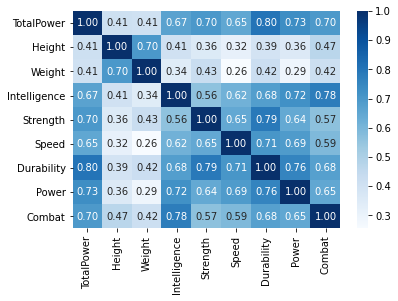

In [63]:
##correlação tabela
import seaborn as sb
corr = heroes[['TotalPower','Height',	'Weight',	'Intelligence',	'Strength',	'Speed',	'Durability',	'Power' ,	'Combat']].corr()
sb.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')

#Aplicação SVM

In [64]:
import numpy as np
from sklearn.svm import SVC

In [65]:
# Parametros escolhidos

param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'], 
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
} 
gridsvm = GridSearchCV(SVC(),param_grid, verbose = 3)
gridsvm.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.646, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.696, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.709, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.671, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.641, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.987, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.987, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.975, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.949, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.987, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.646, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.696, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.709, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
gridsvm.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [70]:

cross_validation_svm.mostraresultadomedio()

		 precision 	 recall 	 f1-score 	 support

0 		 0.99(0.02) 	 0.99(0.02) 	 0.99(0.01) 	 29.7(0.46)

1 		 0.99(0.02) 	 0.99(0.02) 	 0.99(0.01) 	 29.2(0.4)

accuracy 		  		  	 0.99(0.01) 		 

weighted avg 	 0.99(0.01) 	 0.99(0.01) 	 0.99(0.01) 	 58.9(0.3)



## Teste de validação cruzada SVM
>* Aplicação de teste de validação cruzada para o SVM

In [68]:
svm = gridsvm.best_estimator_
cross_validation_svm = runmodel(heroes.drop(columns=['TotalPower']), heroes['TotalPower'], svm, cv = 10, n = 1 )

1 validação cruzada com 10 folds


In [69]:
grid_predictions = gridsvm.predict(X_test)
print(metrics.classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        97

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



##Conclusão SVM
>* O SVM apresentou um excelente resultado.

## Hipótese
>* O SVM tem dificuldade com muitos exemplos, mas a base tem apenas 588, fazendo com que ele consiga traçar hiperplanos com mais facilidade. Quanto menos exemplos ele tem que separar melhor.

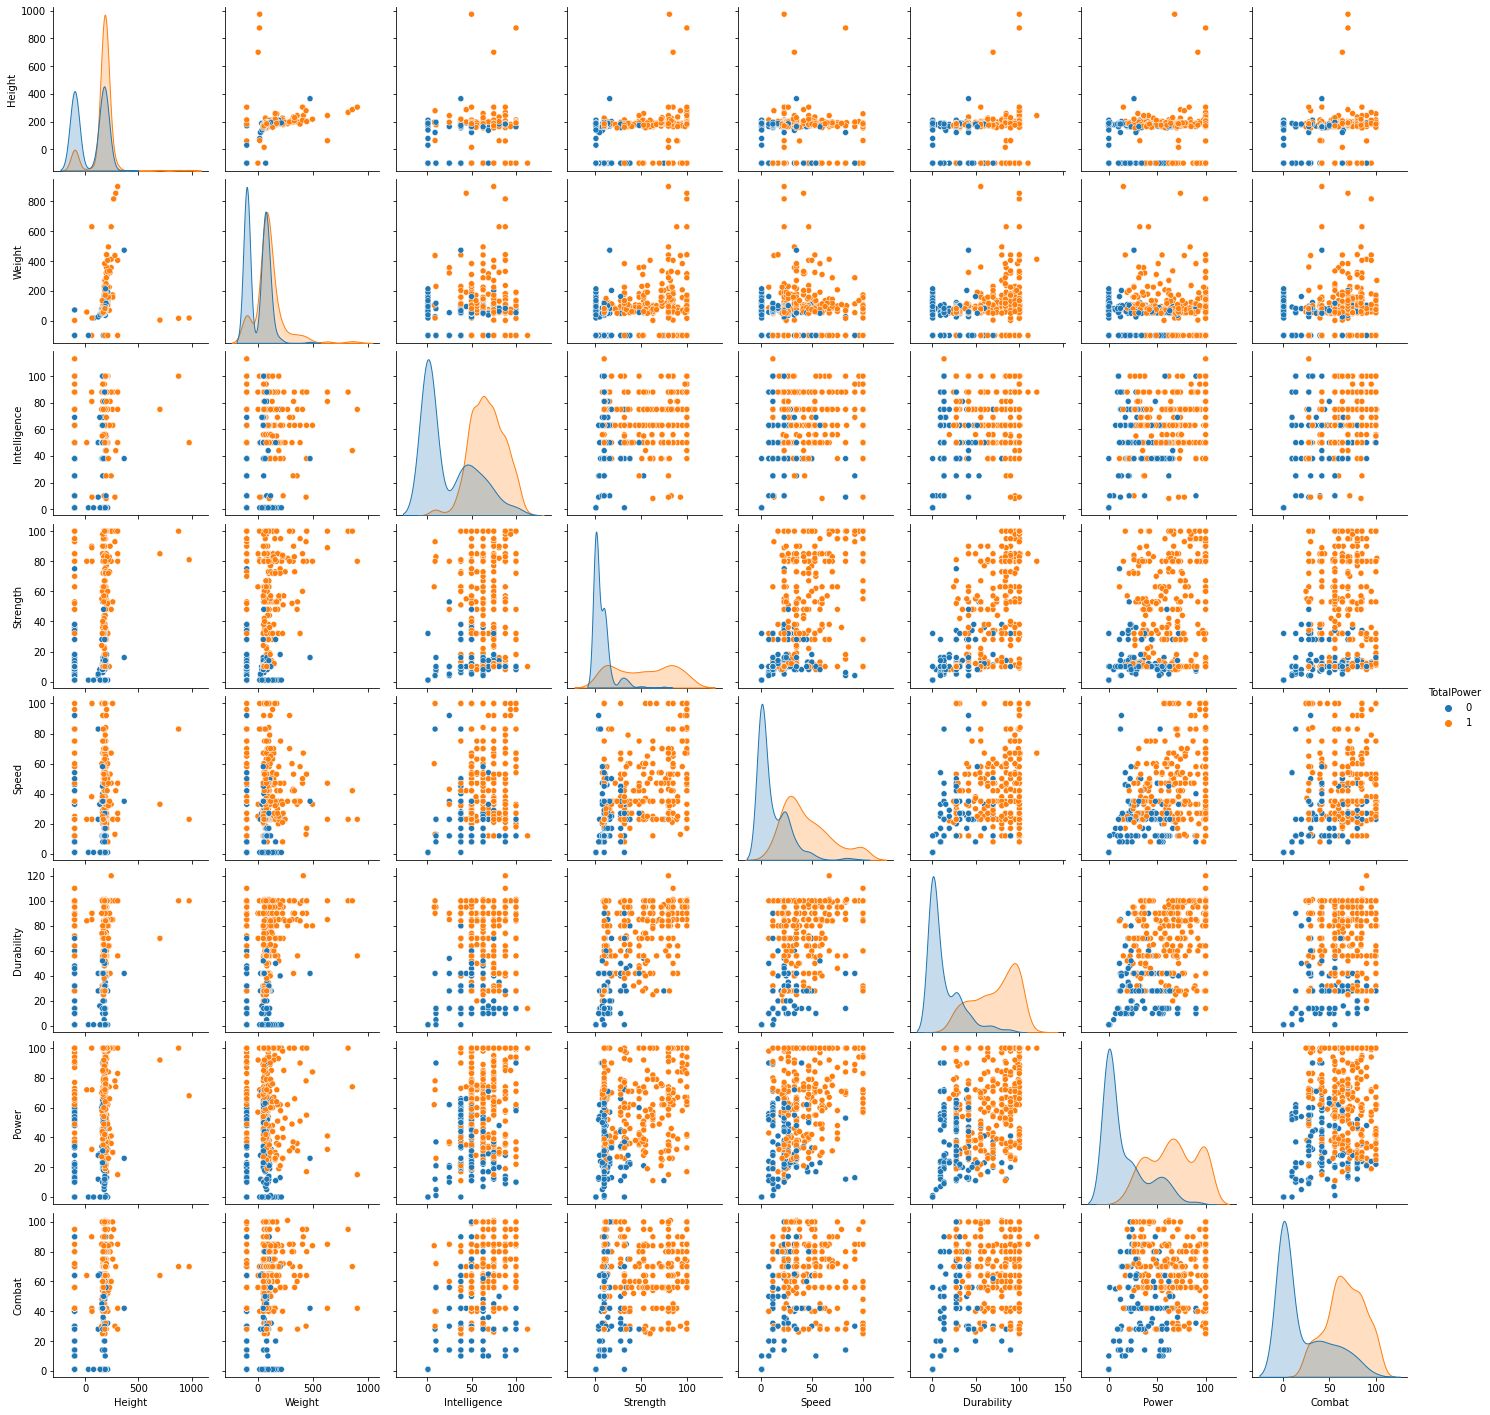

In [73]:
sb.pairplot(data=heroes[['TotalPower','Height',	'Weight',	'Intelligence',	'Strength',	'Speed',	'Durability',	'Power' ,	'Combat']], hue='TotalPower')

# Aplicação Rede Neural MLP (MultiLayer Perceptron)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(heroes.drop(columns=['TotalPower']), heroes['TotalPower'],test_size=0.33, stratify=heroes['TotalPower'])

In [ ]:
 #configuração default
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
from sklearn import metrics
pred = mlp.predict(X_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.97      0.98      0.98       128

    accuracy                           0.97       195
   macro avg       0.97      0.96      0.97       195
weighted avg       0.97      0.97      0.97       195



##  Escolha dos melhores parâmetros usando GridSearchCV

In [76]:

param_grid_mlp = {
    'hidden_layer_sizes': [(100, ), (7,)], #default e heurístico
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 1000, 5000, 10000]
}

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

gridmlp = GridSearchCV(MLPClassifier(),param_grid_mlp, verbose = 1)

gridmlp.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached a

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['

In [78]:
gridmlp.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.1,
 'max_iter': 1000}

In [79]:
gridmlp.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [80]:
gridmlp.best_score_

0.9594287568971114

In [81]:
from sklearn import metrics

pred = gridmlp.predict(X_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.91      0.98      0.95        97

    accuracy                           0.94       195
   macro avg       0.95      0.94      0.94       195
weighted avg       0.95      0.94      0.94       195



## Teste de validação cruzada para MLP

In [82]:
mlp = gridmlp.best_estimator_
cross_validation_mlp = runmodel(heroes.drop(columns=['TotalPower']), heroes['TotalPower'], mlp, cv = 10, n = 1 )

1 validação cruzada com 10 folds


In [83]:
print('\tMédia e desvio padrão do MLP com 10 fold cross validation\n')
cross_validation_mlp.mostraresultadomedio()

	Média e desvio padrão do MLP com 10 fold cross validation

		 precision 	 recall 	 f1-score 	 support

0 		 0.97(0.03) 	 0.97(0.05) 	 0.97(0.03) 	 29.7(0.46)

1 		 0.97(0.04) 	 0.97(0.03) 	 0.97(0.03) 	 29.2(0.4)

accuracy 		  		  	 0.97(0.03) 		 

weighted avg 	 0.97(0.03) 	 0.97(0.03) 	 0.97(0.03) 	 58.9(0.3)



##Conclusão MLP
>* O MLP apresentou um bom resultado mas...

## Hipótese
>* ainda não sei

# Análise final dos resultados